In [1]:
import sys
sys.path.append('//anaconda/lib/python2.7/site-packages/')
from IPython.display import display
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.cluster import FeatureAgglomeration
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
import nltk
from datetime import datetime as dtdm
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, euclidean
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from datetime import datetime as dt
import math
from geopy.distance import vincenty
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

//anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Important Visualizations

The visualizations below were presented on our poster and are shown again here for reference.  They are part of our data exploration process and reflect our analysis of the data given to us.

In [2]:
df = pd.read_csv('time_sentiment.csv')

In [3]:
reviews = pd.read_csv('sentiment_reviews.csv')

In [4]:
reviews[:5].T

,0,1,2,3,4
Unnamed: 0,1,2,5,6,7
listing_id,722394,4074444,68774,920951,462454
id,9248781,23983183,23987149,16985911,13159495
date,2013-12-16,2014-12-15,2014-12-15,2014-08-05,2014-05-20
reviewer_id,6821360,8822691,23170531,16614692,14129237
reviewer_name,Giri,Wendy,Anthony,Anthony,Amanda
comments,Extremely disappointed.,Exactly as described.,The reservation was canceled the day before ar...,Very Nice and comfortable. Great location - Ma...,Sunserae was a phenomenal host. Incredible loc...
tok_reviews,"Sentiment(polarity=-0.75, subjectivity=0.75)","Sentiment(polarity=0.25, subjectivity=0.25)","Sentiment(polarity=0.0, subjectivity=0.0)","Sentiment(polarity=0.5950000000000001, subject...","Sentiment(polarity=0.6025, subjectivity=0.735)"
polarity,-0.75,0.25,0,0.595,0.6025
subjectivity,0.75,0.25,0,0.8375,0.735


In [5]:
reviews['tok_comments'] = reviews.comments.str.split()

In [ ]:
n = 0
all_comments = []
for x in reviews.tok_comments:
    all_comments = x + all_comments
    n += 1
    if n%100==0:
        print(n)

In [ ]:
pd_allcomments = pd.Series(all_comments)
unique = pd_allcomments.valuecounts()
pd_allcomments.to_csv('allcomments.csv')

In [2]:
all_comments = pd.read_csv('allcomments.csv')

In [3]:
unique = all_comments['"We'].value_counts()

In [4]:
top_words = unique[:1000]
wtop_words = pd.DataFrame(top_words)

In [5]:
from nltk.corpus import stopwords

filtered_words = [word for word in wtop_words.index if word not in stopwords.words('english')]

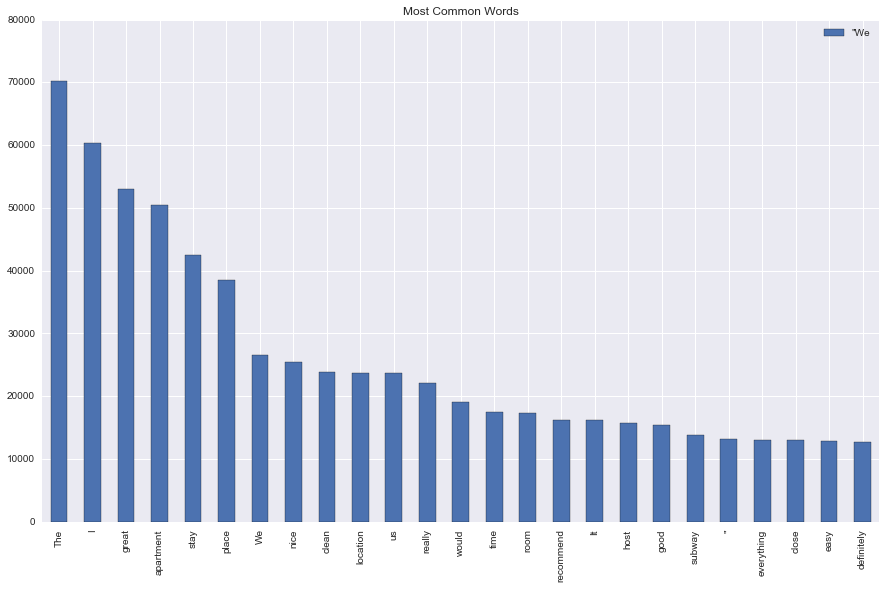

In [8]:
clean_words = wtop_words.loc[filtered_words]
clean_words[:25].plot.bar(figsize=(15,9),title='Most Common Words')

In [2]:
final_df = pd.read_csv('reduced_data.csv')

In [3]:
final_df.shape

(18018, 224)

hit1
hit1
hit1
hit1


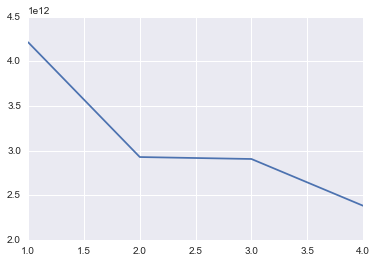

In [12]:
num_clusters = range(1, 5)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    print ('hit1')
    predicted = model.fit_predict(final_df.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(final_df.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)

In [13]:
model = KMeans(n_clusters=4).fit(final_df.values)
final_df["cluster"] = model.labels_
final_df.groupby("cluster").count().iloc[0:, 0]

cluster
0    35200
1    40920
2       10
3    13960
Name: Unnamed: 0, dtype: int64

In [17]:
final_df.cluster[final_df.cluster == 0] = "0cluster"
final_df.cluster[final_df.cluster == 1] = "1cluster"
final_df.cluster[final_df.cluster == 2] = "2cluster"
final_df.cluster[final_df.cluster == 3] = "3cluster"

In [18]:
blues = sns.color_palette("Blues")
reds  = sns.color_palette("Reds")
position_colors = {"0cluster" : blues[4],
                   "1cluster" : blues [2],
                   "2cluster" : reds[4],
                   "3cluster" : reds[2]}
position_order = ["0cluster",
                  "1cluster",
                  "2cluster",
                  "3cluster"]

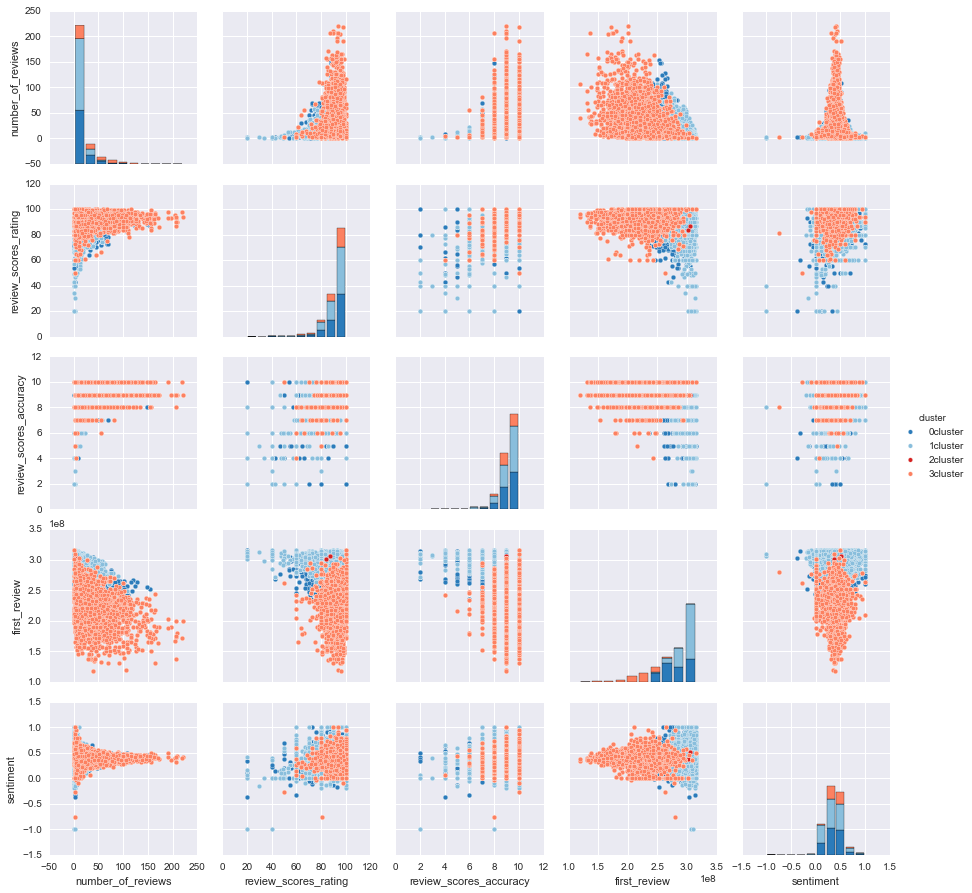

In [21]:
sns_plot = sns.pairplot(final_df, vars=['number_of_reviews','review_scores_rating','review_scores_accuracy','first_review','sentiment'],
             hue="cluster", hue_order=position_order, palette=position_colors)

In [22]:
sns_plot.savefig('matrix_color.png')

In [23]:
final_df[:5]

,Unnamed: 0,latitude,longitude,f,t,Apartment,Bed & Breakfast,Boat,Cabin,Castle,...,host_listing_count,host_since,first_review,last_review,sentiment,Christmas,New Years,New Years Eve,Independence Day,cluster
0,0,40.756852,-73.964754,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,261014400.0,262569600.0,314236800.0,0.283516,0,0,0,0,0cluster
1,1,40.692189,-73.924120,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,4,252806400.0,286934400.0,315273600.0,0.437795,0,0,0,0,0cluster
2,2,40.734751,-74.002592,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,176947200.0,181958400.0,310089600.0,0.308604,0,0,0,0,3cluster
3,3,40.745282,-73.997836,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,308793600.0,313459200.0,313459200.0,0.000000,0,0,0,0,1cluster
4,4,40.679060,-73.994730,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2,190166400.0,206496000.0,313718400.0,0.122600,0,0,0,0,3cluster
